# K-Nearest Neighbor Model Implementation


#### IMPORTS


In [2]:
import numpy as np
import pandas as pd
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

from utils.loading_data  import load_to_df_from_csv, get_all_feature_combinations
from utils.knn_functions import find_best_k_with_misclassification, plot_misclassification, model_iterator

#### STEP 1: LOADING DATA


In [11]:
# Loading the train.csv as the main dataset
data = load_to_df_from_csv("../data/train.csv")

# Column Transformation to lowercase and underscored spaces
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('-', '_')
data.columns = data.columns.str.lower()

X = data.loc[:, data.columns != 'lead']
y = data.loc[:, data.columns == 'lead']

(1039, 1)

### Exploring data


In [7]:
data.shape

(1039, 14)

In [4]:
data.describe()


,number_words_female,total_words,number_of_words_lead,difference_in_words_lead_and_co_lead,number_of_male_actors,year,number_of_female_actors,number_words_male,gross,mean_age_male,mean_age_female,age_lead,age_co_lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


/Users/dininduseneviratne/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/dininduseneviratne/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/dininduseneviratne/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/dininduseneviratne/opt/anaconda3/lib/python3.9/site-packages/nump

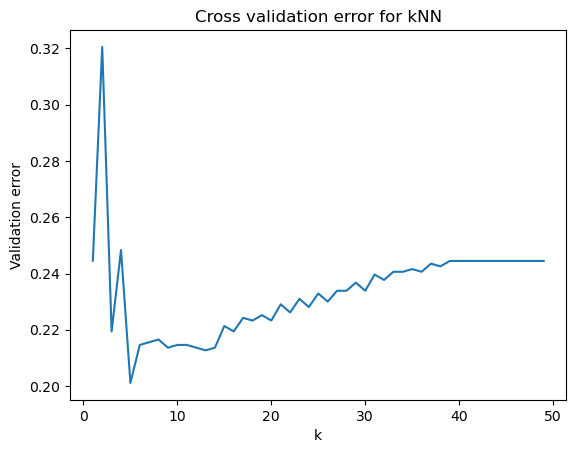

The K which gives the lowest misclassification error is: 5
Lowest misclassification error is: 0.20111090365944734


In [37]:
# Using Scikit learn KFold
n_fold = 10

cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True) 
K = np.arange(1,50)

misclassification = np.zeros(len(K))

for train_index, val_index in cv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k) 
        model.fit(X_train, y_train)
        prediction = model.predict(X_val) 
        prediction = prediction.reshape(prediction.shape[0], 1)
        misclassification[j] += np.mean(prediction != y_val)
        
misclassification /= n_fold
plt.plot(K, misclassification)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()

print("The K which gives the lowest misclassification error is: " + str(K[pd.Series(misclassification).idxmin()]))
print("Lowest misclassification error is: " + str(min(misclassification)))